<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Neural Network - MLPClassifier - Body Performance
</b></font> </br></p>

---


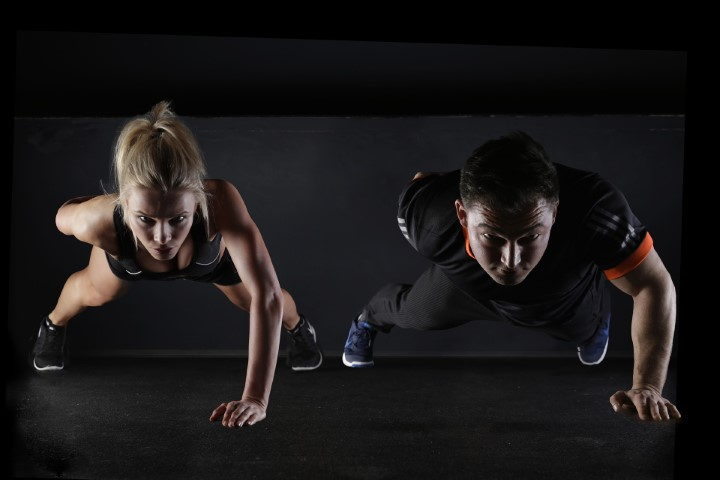

Bild von <a href="https://pixabay.com/de/users/5132824-5132824/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2264825">5132824</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2264825">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>


Daten, die von der National Sports Promotion Foundation zum Gedenken an die Olympischen Spiele in Seoul verwaltet werden. Die Daten beinhatlten den Leistungsgrad, Altersgruppe, Größe, Gewicht, Sit-up, BMI und Weitsprung an Ort und Stelle, etc.  


[DataSet](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)   
[Info](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)   
[Quelle](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1)



In [ ]:
import pandas as pd
df = pd.read_csv('/content/BodyPerformance.csv')

In [ ]:
label = 'class'
features = [n for n in df.columns if n != label]

In [ ]:
target = df[label].copy()
data = df[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
target.value_counts()

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])

<p><font color='black' size="5">
Skalierung
</font></p>

In [ ]:
from sklearn.preprocessing import StandardScaler
data[num_col] = StandardScaler().fit_transform(data[num_col])

<p><font color='black' size="5">
Missing Values
</font></p>

In [ ]:
data.isnull().sum()

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42, stratify=target)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

In [ ]:
target_train.value_counts()

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(verbose=1, max_iter=300, learning_rate='adaptive', random_state=42)
model.fit(data_train, target_train)

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)


<p><font color='black' size="5">
Accuracy
</font></p>

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(target_train, target_train_pred) * 100
print (f"Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}")

In [ ]:
acc_test = accuracy_score(target_test, target_test_pred) * 100
print (f"Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}")


<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
target_test = pd.DataFrame(target_test)
target_test_pred = pd.DataFrame(target_test_pred)
display_labels = ['A', 'B', 'C', 'D']

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(
    target_test, target_test_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels)
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target_test, target_test_pred, target_names=display_labels))

<p><font color='black' size="5">
Real vs Predict
</font></p>

In [ ]:
print("Testlabel: ",  list(target_test.iloc[0,:]))

In [ ]:
print("Pred.-label: ",  list(target_test_pred.iloc[0,:]))

In [ ]:
target_test_pred = model.predict_proba(data_test)

# **5 <font color='orange'>|</font> Deploy**
---